# Kmeans

### Marco Túlio S. da Mata 20193007156 - DECOM LIC Prof. Rogério - CEFET_MG

In [1]:
#util

import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
# load data
data_path = "Data"
data_file = "data2.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = pd.DataFrame(mat["X"], columns=["X1", "X2"])

<span style="color:blue">Task 1)a) K-means for 3 clusters from dat2.mat sample</span>.


In [5]:
# read data
data

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


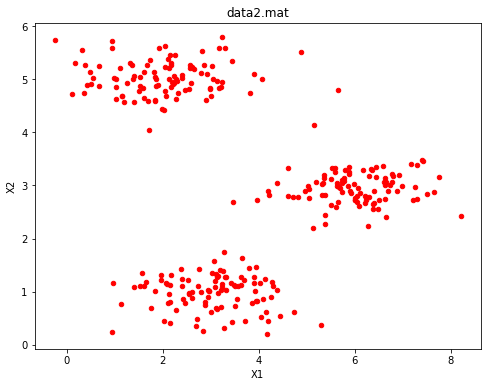

In [9]:
# plot data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], color="red", s=20)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('data2.mat')
plt.show()

In [14]:
def plot_KMeans(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=100, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

def KMeans(data, num_clusters, max_generations):

    # init centers
    centroids = np.zeros((num_clusters, data.shape[1]))
    centroids[0] = data[np.random.randint(0, data.shape[0])]
    for i in range(1, num_clusters):
        distances = np.zeros((data.shape[0], i))
        for j in range(i):
            distances[:, j] = np.linalg.norm(data - centroids[j], axis=1)
        min_distances = np.min(distances, axis=1)
        min_distances = min_distances / np.sum(min_distances)
        centroids[i] = data[np.random.choice(data.shape[0], p=min_distances)]
    
    # exec
    for _ in range(max_generations):
        distances = np.zeros((data.shape[0], num_clusters))
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        for i in range(num_clusters):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    
    return centroids, clusters

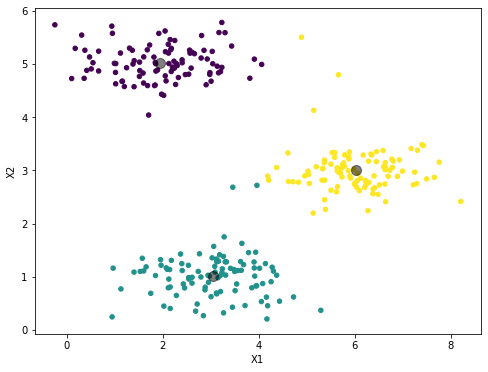

In [15]:
centroids, clusters = KMeans(data.values, 3, 100)
plot_KMeans(data, clusters, centroids)

<span style="color:blue">
1)b) Adjusting KMens for clusters 1 to 20

1)c) store cluster number n inertia values for each model </span>.



In [16]:
def get_model_inertia(data, clusters, centroids):
    inertia = 0
    for i in range(data.shape[0]):
        inertia += np.linalg.norm(data.values[i] - centroids[clusters[i]]) ** 2
    return inertia

In [18]:
clusters_inertia = []
for num_clusters in range(20):
  centroids, clusters = KMeans(data.values, num_clusters + 1, 100)
  inertia = get_model_inertia(data, clusters, centroids)
  clusters_inertia.append([num_clusters + 1, inertia])
  print("Number of Clusters: %d, Inertia: %.4f" % (clusters_inertia[num_clusters][0], clusters_inertia[num_clusters][1]))

Number of Clusters: 1, Inertia: 1957.6547
Number of Clusters: 2, Inertia: 913.3193
Number of Clusters: 3, Inertia: 266.6585
Number of Clusters: 4, Inertia: 216.3602
Number of Clusters: 5, Inertia: 161.7374
Number of Clusters: 6, Inertia: 120.8123
Number of Clusters: 7, Inertia: 107.3283
Number of Clusters: 8, Inertia: 100.8598
Number of Clusters: 9, Inertia: 89.1329
Number of Clusters: 10, Inertia: 77.5426
Number of Clusters: 11, Inertia: 65.4756
Number of Clusters: 12, Inertia: 60.3367
Number of Clusters: 13, Inertia: 63.5597
Number of Clusters: 14, Inertia: 52.1721
Number of Clusters: 15, Inertia: 47.2465
Number of Clusters: 16, Inertia: 46.4744
Number of Clusters: 17, Inertia: 43.4934
Number of Clusters: 18, Inertia: 41.0706
Number of Clusters: 19, Inertia: 42.6853
Number of Clusters: 20, Inertia: 36.9040


Comment: the greater the clusters the lesser the inertia

<span style="color:blue">1)d) Plot Inertia X Clusters Number. Is there an ideal number of clusters as in the elbow method?
</span>


In [19]:
def plot_cluster_inertia(clusters_inertia):
    plt.figure(figsize=(8, 6))
    plt.plot([c[0] for c in clusters_inertia], [c[1] for c in clusters_inertia])
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Correlation Clusters and Inertia")
    plt.show()

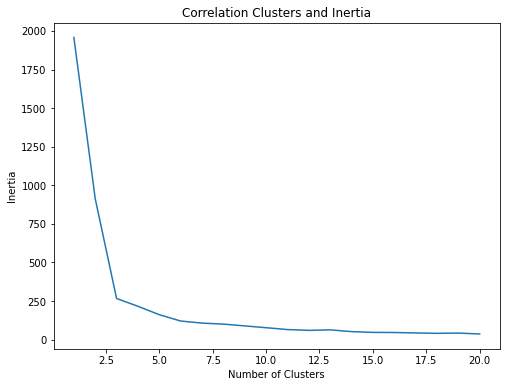

In [20]:
plot_cluster_inertia(clusters_inertia)

Answer: Yes, we can eyeball a value of 3 for the number of clusters



<span style="color:blue">1)e) Fit a Hierarchical Agglomerative Clustering with three clusters, choose and try diff types of linkage
</span>


In [29]:
def hac_plot_merger(data, arr_clusters, titles=None):
    plt.figure(figsize=(16, 6))
    for i in range(len(arr_clusters)):
        plt.subplot(1, len(arr_clusters), i + 1)
        plt.scatter(data["X1"], data["X2"], c=arr_clusters[i], cmap="viridis", s=20)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title(f"{titles is not None and titles[i] or ''}")
    plt.show()
    
def plot_hac(data, method, clusters):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(method)
    plt.show()

In [37]:
methods = ['average', 'complete', 'single', 'ward']

predictions = []

for i, method in enumerate(methods):
	agg_clustering_single = AgglomerativeClustering(n_clusters=3, linkage=method)
	prediction = agg_clustering_single.fit_predict(data)
	predictions.append(prediction)

	# plot_hac(data, method, prediction)

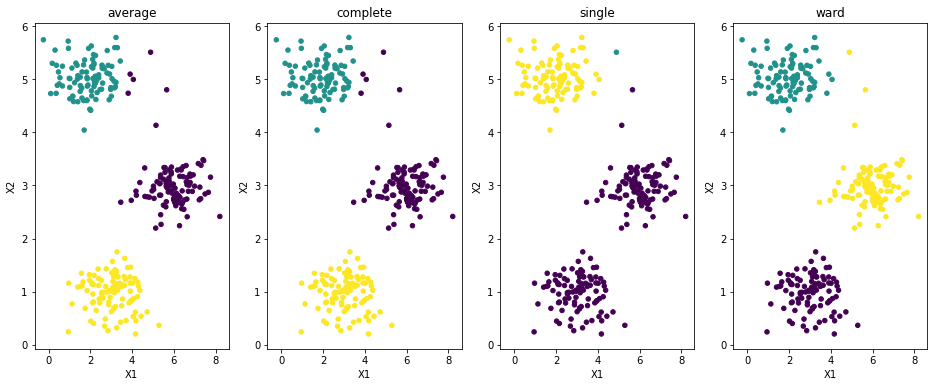

In [38]:
hac_plot_merger(data, predictions, methods)


<span style="color:blue">1)f) Compare predictions
</span>



- It is observed that the division produced by hierarchical methods shows some similarity to that generated by k-means. The greatest discrepancy occurs with the agglomerative clustering method using single linkage

- Of the methods employed, the best result—most aligned with k-means—was achieved using ward. This can be attributed to the nature of the linkage, which seeks to minimize inertia, leading to more cohesive clusters

- In the Agglomerative method, we see that, due to the nature of the algorithm, the clusters are well-formed, much like those in k-means. However, an exception is noted with linkage single, which relies on the minimum distance between elements for clustering

<span style="color:blue">1)g) Visualize the dendrograms
</span>


In [43]:
def plot_dendrogram(data, method):
    plt.figure(figsize=(8, 6))
    dendrogram = sch.dendrogram(sch.linkage(data, method=method))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(method)
    plt.show()

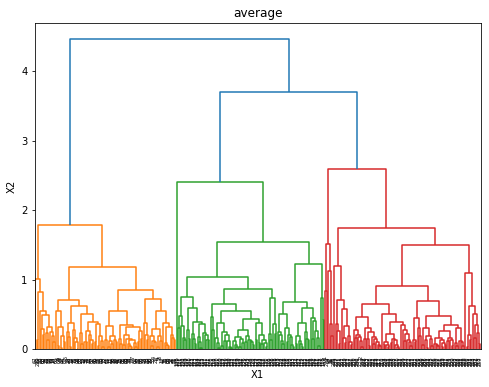

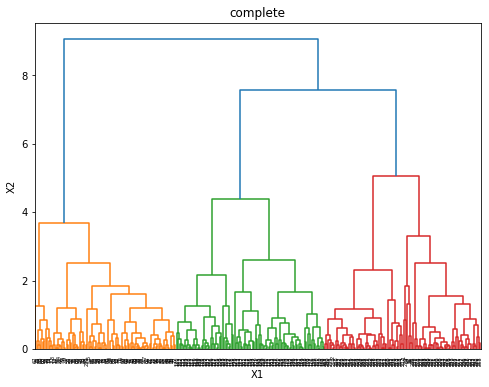

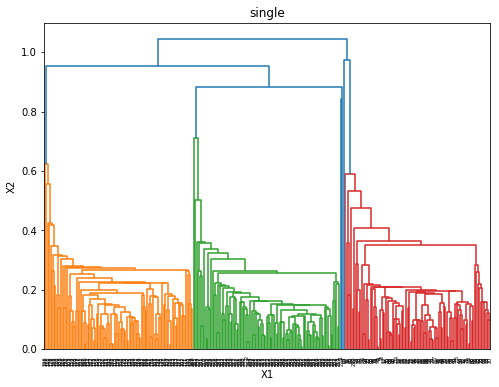

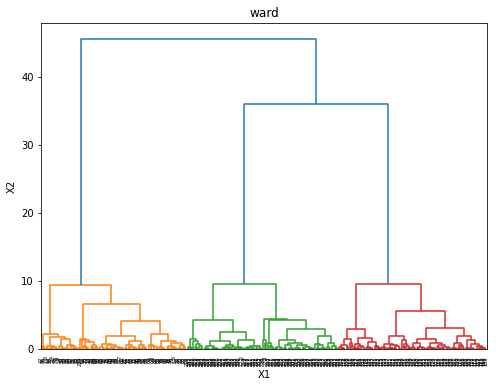

In [44]:
for i, method in enumerate(methods):
	plot_dendrogram(data, method)


<span style="color:blue">Task 2)
</span>


(128, 128, 3)


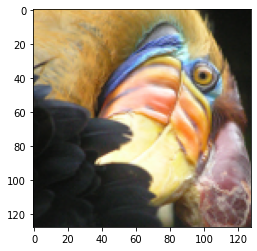

In [48]:
# load data
data_path = "Data"
data_file = "bird_small.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = np.array(mat['A'])

# paste image
print(data.shape)
plt.imshow(data)

c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


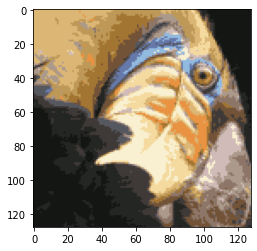

In [55]:
from sklearn.cluster import KMeans

# color nomalization
colors = data / 255
colors = np.reshape(colors, (colors.shape[0] * colors.shape[1], colors.shape[2]))
# print(colors,'\n')
# print(colors.shape)

# Using K-Means to select colors
kmeans_colors = KMeans(n_clusters=16).fit(colors)
selected_colors = kmeans_colors.cluster_centers_
# print(selected_colors)

# map colors
mapped_colors = selected_colors[kmeans_colors.predict(colors).astype(int), :]
#print(mapped_colors)

# reshape image
resized_image = np.reshape(mapped_colors, (data.shape[0], data.shape[1], data.shape[2]))
#print(resized_image)

plt.imshow(resized_image)

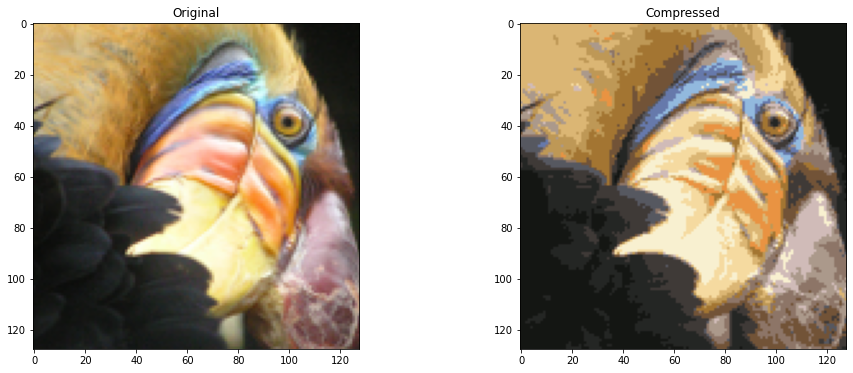

In [56]:
# Comparing both images
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(mat["A"])
plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(resized_image)
plt.show()